In [1]:
import torch
import os,sys; sys.path.insert(0, os.path.abspath('.'))

sys.path.append('../../')
from hex.pytorch.board_graph import Board, PositionalEncoder
from hex.pytorch.graph_net import GraphNet
from utils import dotdict

In [2]:
b = Board(torch.zeros(4,4).long())
b.np_pieces[1,0] = -1
b.np_pieces[1,1] = -1
b.np_pieces[2,1] = -1
b.np_pieces[2,2] = -1
b.np_pieces[0,2] = 1
b.np_pieces[0,3] = 1
b.np_pieces[3,2] = 1
b.np_pieces[2,0] = 1
print(b.display_string, "\n\n", b.np_pieces)

`  0   1   2   3   
  ----------------
0 `   .   .   V   V `
  1 `   H   H   .   . `
    2 `   V   H   H   . `
      3 `   .   .   V   . `
          ---------------- 

 tensor([[ 0,  0,  1,  1],
        [-1, -1,  0,  0],
        [ 1, -1, -1,  0],
        [ 0,  0,  1,  0]])


In [3]:
args = dotdict({
    'lr': 0.001,
    'dropout': 0.3,
    'epochs': 10,
    'batch_size': 64,
    'cuda': torch.cuda.is_available(),
    'num_channels': 32,
    'res_blocks' : 5,
    'board_size' : 7,
    #'in_channels' : 3,                   # 0/1/2 - black/white/empty
    'expand_base' : 2,
    'attn_heads' : 1,
    'pos_encoding_sz' : 28,
    'readout_attn_heads' : 4
})

model = GraphNet(args)

In [4]:
p, v = model(b.np_pieces.unsqueeze(dim=0))

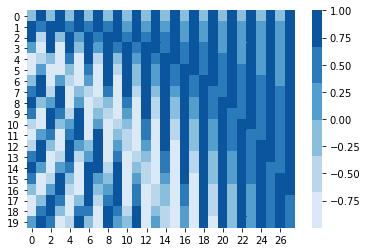

In [5]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

penc = PositionalEncoder(d_model=28, max_seq_len=500, base_wave_length=5)
#x = torch.randperm(20)
x = torch.arange(500)
x = penc(x)

ax = sns.heatmap(x[:20].numpy(), cmap=sns.color_palette("Blues"))

In [8]:
torch.rand(4, 4).softmax(dim=1)

tensor([[0.2206, 0.1805, 0.3694, 0.2295],
        [0.1867, 0.3516, 0.1567, 0.3051],
        [0.2796, 0.2838, 0.2152, 0.2214],
        [0.1994, 0.1881, 0.3167, 0.2958]])

In [33]:
import numpy as np
import torch

In [35]:
a = np.arange(4)
for i, p in enumerate(a):
    print(i, p)

0 0
1 1
2 2
3 3


In [24]:
a = torch.arange(4)
str(a.numpy())

'[0 1 2 3]'

In [21]:
d = {1: 2, 2:3}
len(d)

2

In [27]:
 %matplotlib
 import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [28]:
fig, ax = plt.subplots()
ln, = ax.plot(range(5))


In [29]:
ln.set_color('orange')

In [30]:
plt.ioff()

In [31]:
plt.ion()

In [32]:
ln.set_color('red')

In [4]:
import logging

log = logging.getLogger()

In [9]:
log.warn('hi')

hi


In [17]:
log.level = logging.info()
log

TypeError: info() missing 1 required positional argument: 'msg'

In [18]:
from absl import app, flags, logging

In [20]:
d = {'board_type': 'vortex', 'player2': 'nnet', 'num_games': 2, 'cpu1_checkpoint': 'temp/gat/strong_5x5_b.pth.tar', 'cpu2_checkpoint': 'temp/gat/strong_5x5_b.pth.tar', 'p1_MCTS_sims': 2, 'p2_MCTS_sims': 2, 'game_board_size': 5, 'p1_nnet': 'base_gat', 'p2_nnet': 'base_gat', 'git_record': 'commit c77717f47f31eb09a63d8bea3147aa3c01b07847\nAuthor: Phil Hawkins <phil.a.hawkins@gmail.com>\nDate:   Thu Jul 30 20:04:34 2020 +1000\n\n    refactor with vortex game\n', 'p1_wins': 1, 'p2_wins': 1}

In [21]:
d

{'board_type': 'vortex',
 'player2': 'nnet',
 'num_games': 2,
 'cpu1_checkpoint': 'temp/gat/strong_5x5_b.pth.tar',
 'cpu2_checkpoint': 'temp/gat/strong_5x5_b.pth.tar',
 'p1_MCTS_sims': 2,
 'p2_MCTS_sims': 2,
 'game_board_size': 5,
 'p1_nnet': 'base_gat',
 'p2_nnet': 'base_gat',
 'git_record': 'commit c77717f47f31eb09a63d8bea3147aa3c01b07847\nAuthor: Phil Hawkins <phil.a.hawkins@gmail.com>\nDate:   Thu Jul 30 20:04:34 2020 +1000\n\n    refactor with vortex game\n',
 'p1_wins': 1,
 'p2_wins': 1}

In [28]:
import ast

s = "{'board_type': 'vortex', 'player2': 'nnet', 'num_games': 2, 'cpu1_checkpoint': 'temp/gat/strong_5x5_b.pth.tar', 'cpu2_checkpoint': 'temp/gat/strong_5x5_b.pth.tar', 'p1_MCTS_sims': 2, 'p2_MCTS_sims': 2, 'game_board_size': 5, 'p1_nnet': 'base_gat', 'p2_nnet': 'base_gat', 'git_record': 'commit c77717f47f31eb09a63d8bea3147aa3c01b07847\nAuthor: Phil Hawkins <phil.a.hawkins@gmail.com>\nDate:   Thu Jul 30 20:04:34 2020 +1000\n\n    refactor with vortex game\n', 'p1_wins': 1, 'p2_wins': 1}"
s = s.replace('\n', '\\n')
d = ast.literal_eval(s)
d

{'board_type': 'vortex',
 'player2': 'nnet',
 'num_games': 2,
 'cpu1_checkpoint': 'temp/gat/strong_5x5_b.pth.tar',
 'cpu2_checkpoint': 'temp/gat/strong_5x5_b.pth.tar',
 'p1_MCTS_sims': 2,
 'p2_MCTS_sims': 2,
 'game_board_size': 5,
 'p1_nnet': 'base_gat',
 'p2_nnet': 'base_gat',
 'git_record': 'commit c77717f47f31eb09a63d8bea3147aa3c01b07847\nAuthor: Phil Hawkins <phil.a.hawkins@gmail.com>\nDate:   Thu Jul 30 20:04:34 2020 +1000\n\n    refactor with vortex game\n',
 'p1_wins': 1,
 'p2_wins': 1}

In [21]:
import networkx as nx
import numpy as np
import scipy as sp
import torch
from pyvis import network as net


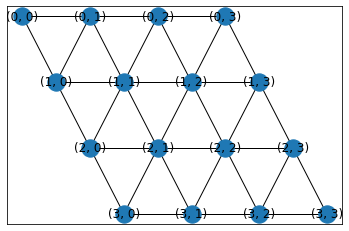

In [96]:
bsize = 4
n = bsize**2
G = nx.grid_2d_graph(bsize, bsize)

layout = {}
for i in range(bsize):
    for j in range (bsize):
        if i < (bsize-1) and j > 0:
            G.add_edge((i, j), (i+1, j-1))
        layout[(i, j)] = (j + (i/2), bsize-1-i)
nx.draw_networkx(G, layout)

In [102]:
A = nx.to_scipy_sparse_matrix(G)
edge_index = torch.tensor(A.nonzero())
A = torch.sparse_coo_tensor(indices=edge_index, values=torch.ones_like(edge_index[0]), size=(n, n))
Ad = A.to_dense()
edge_index, n

(tensor([[ 0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  5,
           5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,
           8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12,
          12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15],
         [ 1,  4,  0,  2,  4,  5,  1,  3,  5,  6,  2,  6,  7,  0,  1,  5,  8,  1,
           2,  4,  6,  8,  9,  2,  3,  5,  7,  9, 10,  3,  6, 10, 11,  4,  5,  9,
          12,  5,  6,  8, 10, 12, 13,  6,  7,  9, 11, 13, 14,  7, 10, 14, 15,  8,
           9, 13,  9, 10, 12, 14, 10, 11, 13, 15, 11, 14]], dtype=torch.int32),
 16)

In [105]:
# connectivity distance 1
# tree depth 2
A1c = torch.einsum('ij,jk->ikj',Ad,Ad)
A1 = ((A1c.sum(dim=2) > 1).long().fill_diagonal_(0) - Ad).relu()
A1c = A1c * A1.unsqueeze(dim=2)

Ad, A1, A1c[0, 5]

(tensor([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]], dtype=torch.int32),
 tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0

In [106]:
A1c[0, 5], A1c[5, 10]

(tensor([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

In [118]:
def and_rule(v1, v2):
    vi = (v1*v2).max() + 1
    vm = (v1.sum() - vi) * (v2.sum() - vi)
    return min(max(vm, 0), 1)

In [119]:
and_rule(A1c[0, 5], A1c[5, 10])

tensor(1)

In [120]:
and_rule(A1c[1, 6], A1c[6, 8])

tensor(0)